In [50]:
import numpy as np
import numpy.random as nr
import time 

In [51]:
def caminantehex(Caminantes,Pasos):
    dir = np.random.randint(6, size=(Caminantes, Pasos))
    dx = np.zeros((Caminantes, Pasos),dtype = "float")
    dy = np.zeros((Caminantes, Pasos),dtype = "float")

    dx[dir==0],dx[dir==1],dx[dir==2],dx[dir==3],dx[dir==4],dx[dir==5]=0.5,1,0.5,-0.5,-1,-0.5
    dy[dir==0],dy[dir==1],dy[dir==2],dy[dir==3],dy[dir==4],dy[dir==5]=0.86603,0,-0.86603,-0.86603,0,0.86603

    X,Y  = np.cumsum(dx,axis=1),np.cumsum(dy,axis=1)

    Xmean, Ymean = np.mean(X,axis = 0),np.mean(Y,axis = 0)

    R = ((X*X).mean(axis=0)-Xmean**2) + ((Y*Y).mean(axis=0)-Ymean**2)

    return R, Xmean, Ymean

In [52]:
N1=824
N2=924
N3=1024

R1,X1mean,Y1mean=caminantehex(1000,N1)
R2,X2mean,Y2mean=caminantehex(1000,N2)
R3,X3mean,Y3mean=caminantehex(1000,N3)

In [53]:
def lineFit(x, y):
    xavg = np.mean(x)
    slope = (y * (x - xavg)).sum() / (x * (x - xavg)).sum()
    yint = np.mean(y) - slope * xavg
    return slope, yint

In [54]:
import matplotlib.pyplot as plt

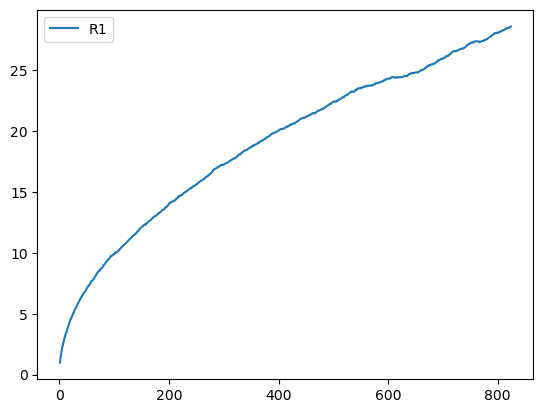

In [55]:
Ngraf=np.arange(1,N1+1)
plt.plot(Ngraf,np.sqrt(R1),label="R1")
#plt.plot(np.sqrt(R2),np.arange(1,N2+1))
#plt.plot(np.sqrt(R3),np.arange(1,N3+1))
plt.legend(loc = 'best')

plt.show()

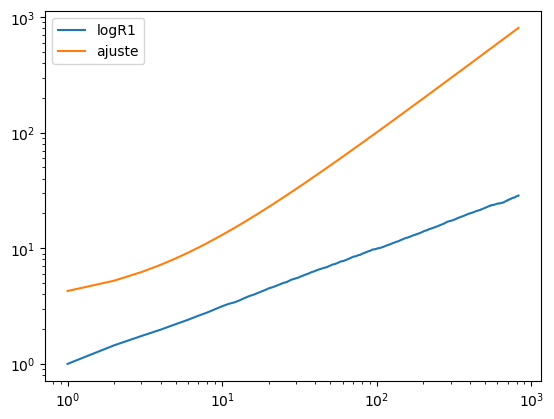

In [56]:
plt.loglog(Ngraf,np.sqrt(R1),label="logR1")
slope, corte = lineFit(np.arange(1,N1+1),R1)
ajuste = slope*np.arange(1,N1+1) + corte
plt.plot(np.arange(1,N1+1),ajuste,label="ajuste")
plt.legend(loc = 'best')

plt.show()

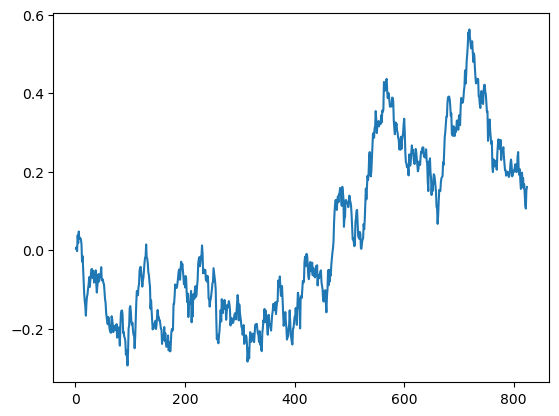

In [57]:
plt.plot(Ngraf,X1mean)
plt.show()

In [58]:
def caminantelibre(Caminantes,Pasos):
    dir = np.random.randint(361, size=(Caminantes, Pasos))
    dx = np.zeros((Caminantes, Pasos),dtype = "float")
    dy = np.zeros((Caminantes, Pasos),dtype = "float")

    dx=np.cos(dir)
    dy=np.sin(dir)

    X,Y  = np.cumsum(dx,axis=1),np.cumsum(dy,axis=1)

    Xmean, Ymean = np.mean(X,axis = 0),np.mean(Y,axis = 0)

    R = ((X*X).mean(axis=0)-Xmean**2) + ((Y*Y).mean(axis=0)-Ymean**2)

    return R, Xmean, Ymean, X, Y

In [59]:
N4=10000
cam=1000

R,xmean,ymean,x,y=caminantelibre(cam,N4)

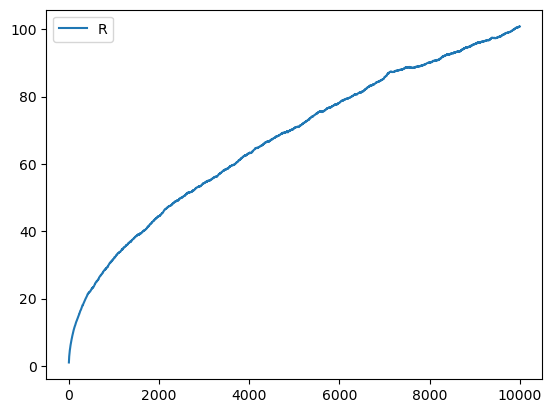

In [60]:
Ngraf2=np.arange(1,N4+1)
plt.plot(Ngraf2,np.sqrt(R),label="R")
plt.legend(loc = 'best')

plt.show()

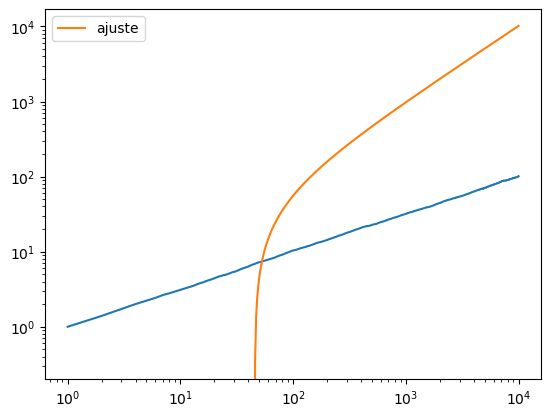

In [61]:
plt.loglog(Ngraf2,np.sqrt(R))
slope, corte = lineFit(np.arange(1,N4+1),R)
ajuste = slope*np.arange(1,N4+1) + corte
plt.plot(np.arange(1,N4+1),ajuste,label="ajuste")
plt.legend(loc = 'best')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


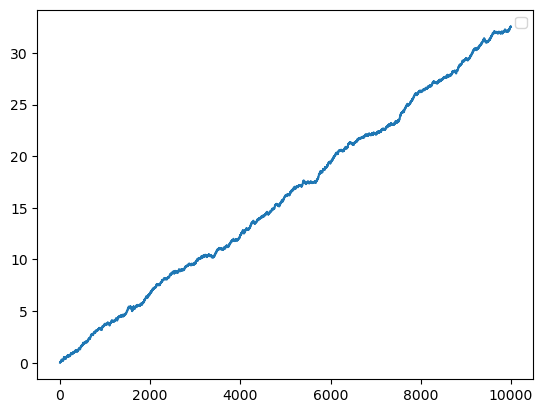

In [62]:
plt.plot(Ngraf2,xmean)
plt.show()